In [8]:
import torch

### 多项分布
"""
什么是多项分布：在多次实验中，多个不同结果发生指定次数的概率是多少
"""
from torch.distributions import multinomial
fair_probe = torch.ones([6]) / 6  # 每个结果的概率设置为1/6
probs = multinomial.Multinomial(10000, fair_probe).sample(sample_shape=[5000])  # 采样500次，每次采样10000个
probs / 10000

tensor([[0.1647, 0.1671, 0.1712, 0.1668, 0.1679, 0.1623],
        [0.1668, 0.1678, 0.1663, 0.1727, 0.1697, 0.1567],
        [0.1654, 0.1715, 0.1663, 0.1660, 0.1664, 0.1644],
        ...,
        [0.1683, 0.1637, 0.1678, 0.1722, 0.1552, 0.1728],
        [0.1651, 0.1609, 0.1711, 0.1655, 0.1673, 0.1701],
        [0.1657, 0.1742, 0.1672, 0.1607, 0.1659, 0.1663]])

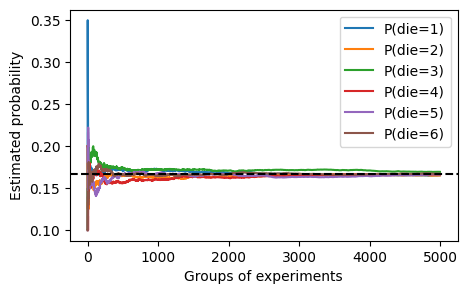

In [2]:
from matplotlib import pyplot as plt
### 现在我们测试随着实验次数的增多，概率的变化情况
import torch
from torch.distributions import Multinomial
fair_probs = torch.ones([6])/6
counts = Multinomial(10, fair_probs).sample(sample_shape=[5000])
cum_count = counts.cumsum(dim=0) # 每一次加上前面所有的出现次数
estimates = cum_count/cum_count.sum(dim=1, keepdim=True)  # 计算当前出现的概率

# 画图
plt.rcParams['figure.figsize'] = (5.0, 3.0)  # 直接设置图形大小
for i in range(6):
    plt.plot(estimates[:, i].numpy(),
             label=("P(die=" + str(i+1) + ")"))

plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.xlabel('Groups of experiments')
plt.ylabel('Estimated probability')
plt.legend()
plt.show()

### 连续性随机变量和离散型随机变量
在连续性随机变量中，因为空间中有无数个点，所以取某一个确定值的概率近似为0，我们通常用概率密度函数来描述在某一点的取值概率。它描述的是 “随机变量在某点附近的概率 “密集程度”，只有通过积分（即 “曲线下面积”）才能得到概率。
在离散型随机变量中，因为空间中有有限个点，所以取某一个确定值的概率不为0，我们通常用概率分布函数来描述在某一点的取值概率。
概率密度函数和概率分布函数的区别：

| 对比维度         | 概率分布函数（CDF, *F*(*x*)）                                | 概率密度函数（PDF, *f*(*x*)）                                |
| ---------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| **适用对象**     | 所有随机变量（离散、连续、混合型）                           | 仅连续型随机变量                                             |
| **核心意义**     | 直接表示概率：*F*(*x*)=*P*(*X*≤*x*)                          | 表示概率密度（非概率），需积分得概率                         |
| **取值范围**     | 0≤*F*(*x*)≤1（因本质是概率）                                 | *f*(*x*)≥0（非负），可大于 1（如均匀分布*U*(0,0.5)的 PDF 为 2） |
| **单调性**       | 单调不减（*x*1<*x*2⟹*F*(*x*1)≤*F*(*x*2)）                    | 无单调性要求（可增可减，如正态分布 PDF 先增后减）            |
| **极限行为**     | lim*x*→−∞*F*(*x*)=0，lim*x*→+∞*F*(*x*)=1                     | lim*x*→±∞*f*(*x*)=0，且∫−∞+∞*f*(*x*)*d**x*=1（总面积为 1）   |
| **单点取值意义** | 离散型：*F*(*x*)−*F*(*x*−)=*P*(*X*=*x*)（跳跃值为单点概率）；连续型：*F*(*x*)光滑，单点概率为 0 | 连续型：*f*(*x*)不表示*P*(*X*=*x*)（连续型单点概率恒为 0）   |




### 条件概率
什么是条件概率？条件概率是两个概率变量之间的一种概率关系，比如：A和B是两个概率变量，那么A给定B的概率就是A和B的 conditional probability。
条件概率的公式为：P(A|B) = P(A,B) / P(B)
条件概率的含义是：给定B，A出现的概率。

### 边际化
边际化（Marginalization） 是从多变量联合概率分布中，通过 “消除”（或 “积分 / 求和”）某个 / 某些无关变量，得到剩余变量的边缘概率分布的过程。其核心目的是 “聚焦感兴趣的变量”，忽略次要变量的影响，从而简化概率分析。

形象理解：假设身高（x）和体重（y）的联合分布，边际化Y得到一个身高的边缘分布，即不考虑体重差异时，身高本身的概率分布。

离散型随机变量的边际化：
离散型随机变量的边缘分布，也称为边缘概率分布，是该变量在给定某些条件（条件变量）的情况下的概率分布。

设X,Y是离散型随机变量，联合概率分布P(X=xi,Y=yi)
对Y边缘化，即P(X=xi) = ∑P(X=xi,Y=yi)
边缘化操作的数学公式为：

P(X=xi) = ∑P(X=xi,Y=yi)

其中，xi是X的取值，yi是Y的取值。

假设X是掷骰子的点数，Y是抛硬币的结果，且X和Y独立，则
- 联合概率：P(X=xi,Y=yi) = P(X=xi)P(Y=yi)=1/6*1/2=1/12
- 边际化Y求P(X=1)：P(X=1) = ∑P(X=1,Y=0) + ∑P(X=1,Y=1) = 1/12 + 1/12 = 2/12 = 1/6


连续性随机变量的边际化：
假设X是正态分布的随机变量，Y是X的函数，则
- 联合概率：P(X=xi,Y=yi) = f(xi,yi)
- 边缘化Y求P(X=xi)：P(X=xi) = ∫f(xi,yi)dyi


### 贝叶斯定理
贝叶斯定理（Bayes' theorem）是概率论中的一个重要公式，用于计算两个概率事件之间的条件概率。
贝叶斯定理的数学公式为：
P(A|B) = P(B|A)P(A)/P(B)
贝叶斯定理的数学解释如下：
- P(A|B)：事件A在事件B发生时发生的概率。
- P(B|A)：事件B在事件A发生时发生的概率。
- P(A)：事件A发生的概率。
- P(B)：事件B发生的概率。

在概率论中，事件A和B是两个互不相交的事件，即A和B之间没有交集。
根据贝叶斯定理，事件A在事件B发生时发生的概率等于事件B在事件A发生时发生的概率乘以事件A发生的概率除以事件B发生的概率。


### 依赖和独立
在概率论中，两个事件A和B是相互独立的（independently）的，即A和B之间没有 joint probability。

则P(A|B) = P(A)

A和B独立，记为A⊥B。

有一个重要的性质：如果P(A,B)= P(A)P(B)，则A和B是相互独立的。

同样，给定一个随机变量C，如果P(A,B | C) = P(A|C)P(B|C)，则A和B是相互独立的。记作A⊥B|C。



